# PyWeather

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Create empty list for holding the latitude and longitude combinations
lat_lngs = []

# Create empty list for holding the city names
city_list = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in city_list:
        city_list.append(city)

# Check and print the number of cities in the list
print(f"Number of cities in the list: {len(city_list)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list 

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1
# Variable to keep track of cities for which data was not found
data_not_found_count = 0  

# Loop through all the cities in list to fetch weather data
for i, city in enumerate(city_list):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and API key
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request and get the response
        response = requests.get(city_url)

        # Check if data was found for the city
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
        
            if city_weather is not None:
                # Parse out required data from the response
                city_lat = city_weather.get("coord").get("lat", None)
                city_lng = city_weather.get("coord").get("lon", None)
                city_max_temp = city_weather.get("main").get("temp_max", None)
                city_humidity = city_weather.get("main").get("humidity", None)
                city_clouds = city_weather.get("clouds").get("all", None)
                city_wind = city_weather.get("wind").get("speed", None)
                city_country = city_weather.get("sys").get("country", None)
                city_date = city_weather.get("dt", None)

                # Append the City information into city_data list
                city_data.append({"City": city,
                                  "Lat": city_lat,
                                  "Lng": city_lng,
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})
            else:
                print("City data not found. Skipping...")
                data_not_found_count += 1
        else:
            print("City data not found. Skipping...")
            data_not_found_count += 1

    # If an error is experienced, skip the city
    except:
        print("Error occurred while fetching data for the city. Skipping...")
        data_not_found_count += 1
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Print the total number of cities data fetched
print(f"Number of cities data fetched: {len(city_data)}")   

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | kapuskasing
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | glace bay
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | plastun
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | desaguadero
Processing Record 14 of Set 1 | gaspe
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | mutuali
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | carutapera
Processing Record 22 

In [4]:
print(len(city_data))

567


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Preview the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,26.05,50,75,3.09,CA,1691532253
1,vorgashor,67.5833,63.9500,9.05,75,100,2.97,RU,1691532408
2,blackmans bay,-43.0167,147.3167,2.63,94,39,2.98,AU,1691532352
3,hermanus,-34.4187,19.2345,11.17,82,0,5.32,ZA,1691532355
4,yellowknife,62.4560,-114.3525,20.87,46,3,7.60,CA,1691532524


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Preview the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,26.05,50,75,3.09,CA,1691532253
1,vorgashor,67.5833,63.9500,9.05,75,100,2.97,RU,1691532408
2,blackmans bay,-43.0167,147.3167,2.63,94,39,2.98,AU,1691532352
3,hermanus,-34.4187,19.2345,11.17,82,0,5.32,ZA,1691532355
4,yellowknife,62.4560,-114.3525,20.87,46,3,7.60,CA,1691532524


### Create the Scatter Plots 

#### Latitude vs Temperature

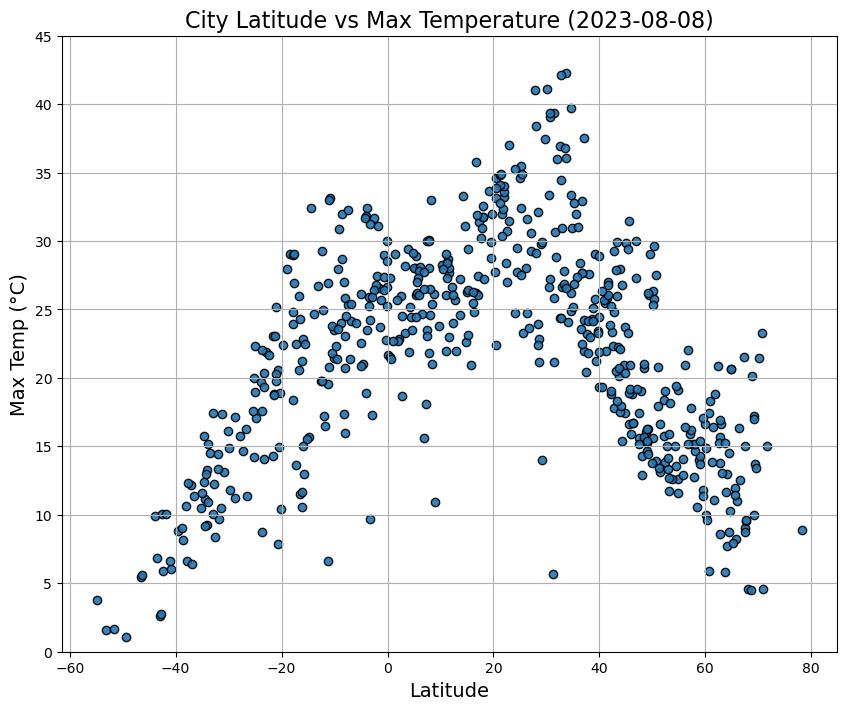

In [9]:
# Build scatter plot for latitude vs temperature 
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=.9)  
plt.grid()
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp (°C)', fontsize=14)
today_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Max Temperature ({today_date})', fontsize=16)  
plt.ylim(0, 45) 

# Save the figure   
plt.savefig('../output_data/Max_Lat_vs_Temp.png')  
# Show the plot
plt.show()

#### Latitude vs Humidity

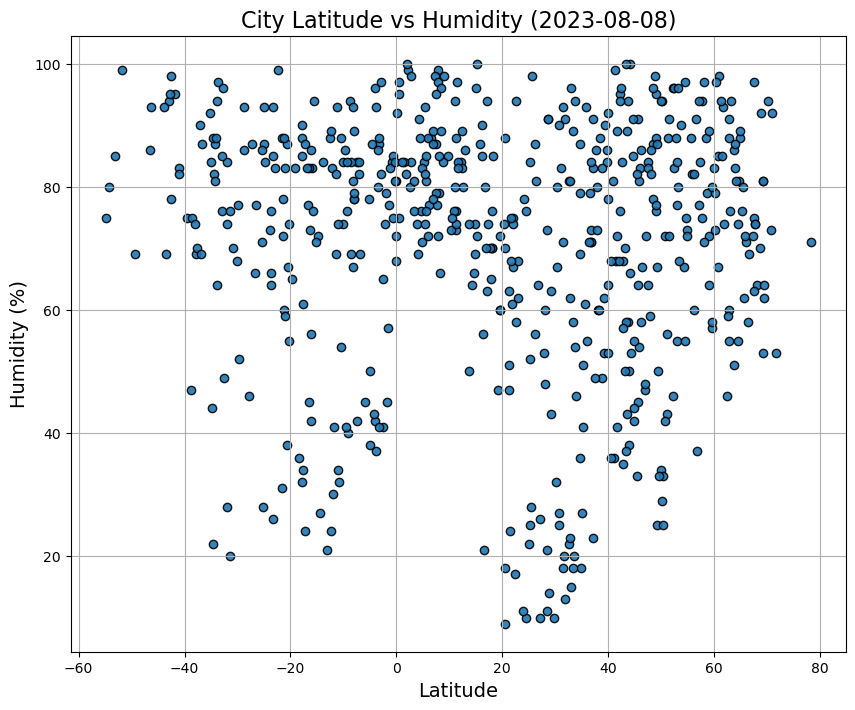

In [10]:
# Build scatter plot for latitude vs humidity 
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=.9)  
plt.grid()
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
today_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Humidity ({today_date})', fontsize=16)  

# Save the figure   
plt.savefig('../output_data/Lat_vs_Humidity.png')  
# Show the plot
plt.show()

#### Latitude vs Cloudiness

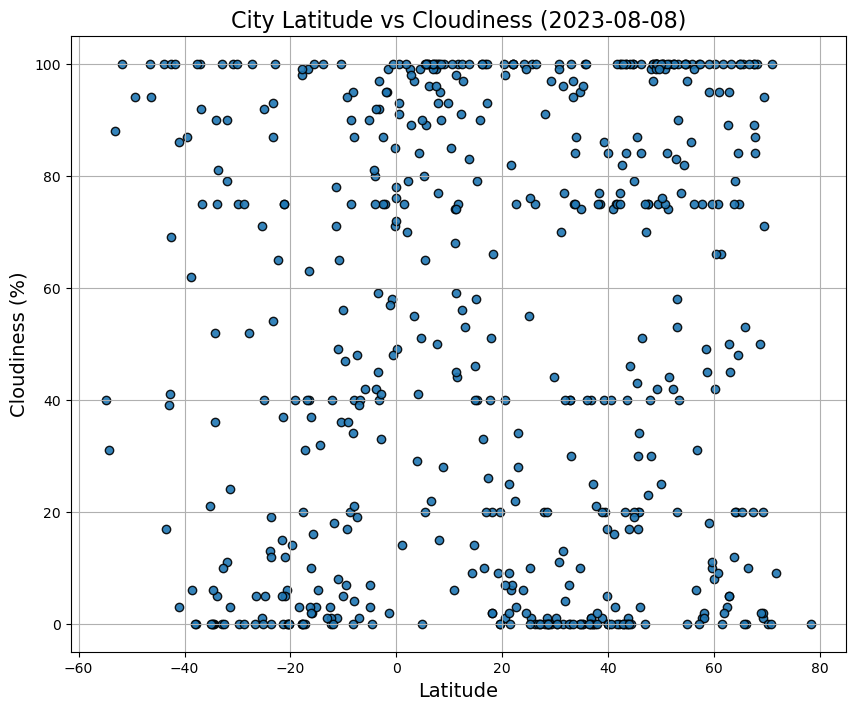

In [11]:
# Build scatter plot for latitude vs cloudiness
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=.9)
plt.grid()
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
today_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Cloudiness ({today_date})', fontsize=16)  

# Save the figure   
plt.savefig('../output_data/Lat_vs_Cloudiness.png')  
# Show the plot
plt.show()

#### Latitude vs Wind Speed

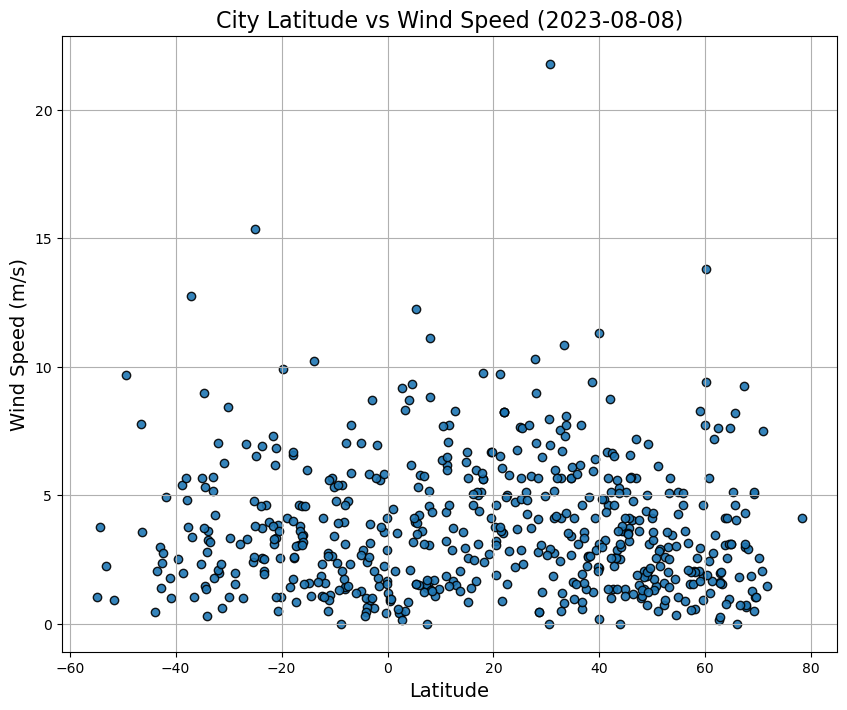

In [12]:
# Build scatter plot for latitude vs wind speed
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=.9)
plt.grid()
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
today_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Wind Speed ({today_date})', fontsize=16)  

# Save the figure   
plt.savefig('../output_data/Lat_vs_wind.png')  
# Show the plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to  create Linear Regression plots  
def plot_lin_reg(x_data, y_data, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Calculate the regression line
    y_pred = slope * x_data + intercept
    
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, color='steelblue', alpha=0.8, label='Data')
    plt.plot(x_data, y_pred, color='red', linewidth=2, label='Linear Regression')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    
    # Add regression equation and r-value to the plot
    reg_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.95, f'Date: {today_date}', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='left', va='top')
   
    plt.text(0.05, 0.1, reg_eq, transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
    print(f'The r-value is: {r_value}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data 
north_hem_data = city_data_df[city_data_df['Lat'] >=0]

# Preview the DataFrame
north_hem_data.head()   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,26.05,50,75,3.09,CA,1691532253
1,vorgashor,67.5833,63.9500,9.05,75,100,2.97,RU,1691532408
4,yellowknife,62.4560,-114.3525,20.87,46,3,7.60,CA,1691532524
6,bilibino,68.0546,166.4372,4.58,64,100,2.89,RU,1691532525
8,glace bay,46.1969,-59.9570,18.83,86,100,4.02,CA,1691532526


In [15]:
# Create a DataFrame with the Southern Hemisphere data 
south_hem_data = city_data_df[city_data_df['Lat'] < 0]

# Preview the DataFrame
south_hem_data.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,2.63,94,39,2.98,AU,1691532352
3,hermanus,-34.4187,19.2345,11.17,82,0,5.32,ZA,1691532355
5,atafu village,-8.5421,-172.5159,28.66,69,90,5.40,TK,1691532524
7,waitangi,-43.9535,-176.5597,9.90,93,100,0.45,NZ,1691532525
10,west island,-12.1568,96.8225,24.99,83,40,4.12,CC,1691532233


###  Latitude vs Max Temperature Linear Regression Plots

The r-value is: -0.6287512535132748


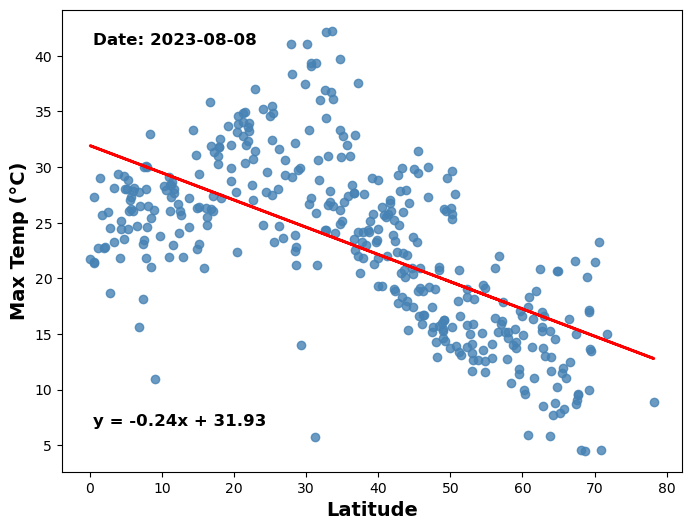

In [16]:
# Linear regression on the Northern Hemisphere for Latitude vs Max Temperature
x_data_north = north_hem_data['Lat']
y_data_north = north_hem_data['Max Temp']
plot_lin_reg(x_data_north, y_data_north, 'Latitude', 'Max Temp') 
plt.ylabel('Max Temp (°C)')
plt.show()


The r-value is: 0.817404793160795


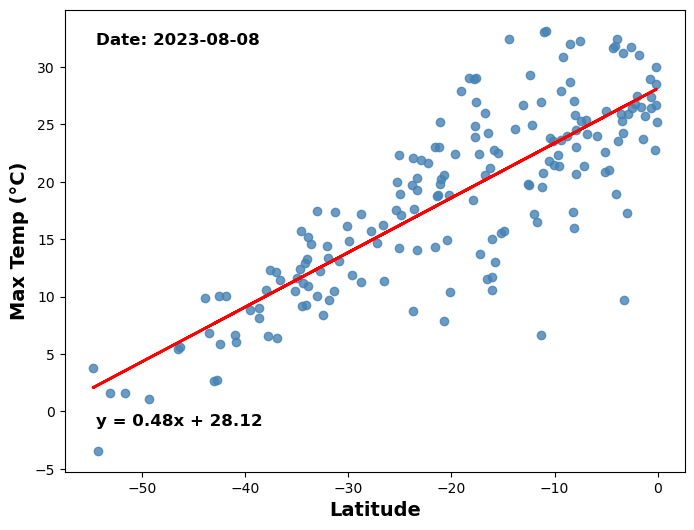

In [17]:
# Linear regression on the Southern Hemisphere for Max Latitude vs Max Temperature
x_data_south = south_hem_data['Lat']
y_data_south = south_hem_data['Max Temp']
plot_lin_reg(x_data_south, y_data_south, 'Latitude', 'Max Temp')
plt.ylabel('Max Temp (°C)')
plt.show()

### All discussions about correlation in this script are based on the r-values computed at the time this script was run, and the correlation coefficient scale displayed below:
<img src="../WeatherPy/corr_co_pic.png" width="800" height="600">


**Discussion about the linear relationship (TEMPERATURE):** 

The linear regression on the Northern Hemisphere yields a r-value of approximately -0.63, and indicates a moderate to strong negative correlation between latitude and max temperatures. This means that max temperatures tend to decrease as latitude increases, that is, max temperatures of cities in the northern hemisphere tend to get lower/colder the farther north they are located of the equator. 

The linear regression on the Southern Hemisphere yields a r-value of approximately 0.82, and indicates a strong positive correlation or direct relationship between latitiude and max temperatures. This means that max temperatures tend to decrease as latitude decreases, that is, max temperatures of cities in the southern hemisphere tend to get lower/colder the farther south they are located of the equator. 

CONCLUSION:
Both linear regressions support a conclusion that the cities with the warmer max temperatures are located closest to the equator. 

### Latitude vs Humidity Linear Regression Plots

The r-value is: -0.03885145188443712


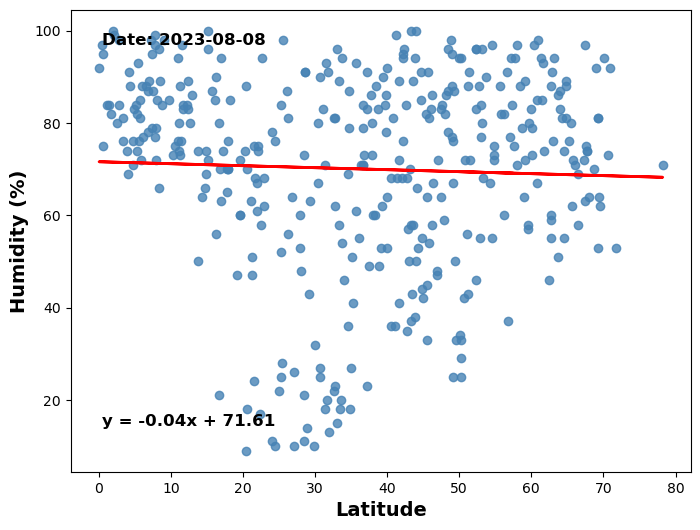

In [18]:
# Linear regression on the Northern Hemisphere for Latitude vs Humidity 
x_data_north = north_hem_data['Lat']
y_data_north = north_hem_data['Humidity']
plot_lin_reg(x_data_north, y_data_north, 'Latitude', 'Humidity') 
plt.ylabel('Humidity (%)')  
plt.show()


The r-value is: -0.15130396687187833


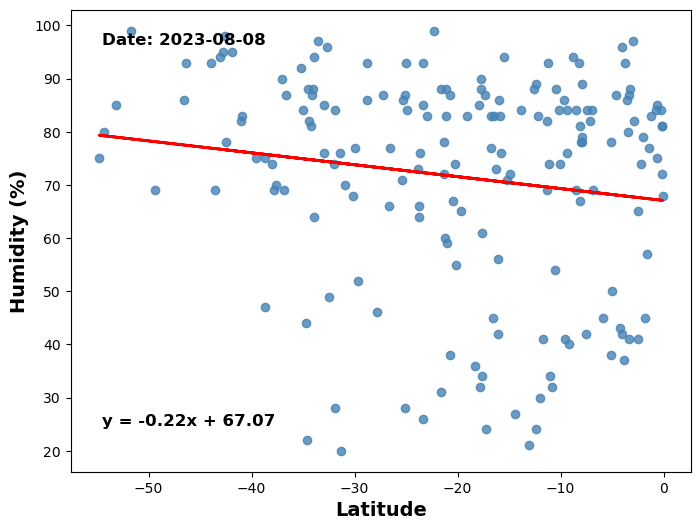

In [19]:
# Linear regression on the Southern Hemisphere for Latitude vs Humidity 
x_data_south = south_hem_data['Lat']
y_data_south = south_hem_data['Humidity']
plot_lin_reg(x_data_south, y_data_south, 'Latitude', 'Humidity') 
plt.ylabel('Humidity (%)')
plt.show()


**Discussion about the linear relationship (HUMIDITY):** 

The linear regression on the Northern Hemisphere yields a r-value of approximately -0.04, and indicates no correlation between latitude and humidity. 

The linear regression on the Southern Hemisphere yields a r-value of approximately -0.15, and indicates a poor correlation between latitiude and humifdity. 

CONCLUSION:
Both linear regressions support a conclusion that there is  very weak evidence to argue that latitude is a strong predictor of humidity. Therefore a city's location is not enough to make a prediction of how humid the city is. 

### Latitude vs Cloudiness Linear Regression Plots

The r-value is: -0.08668230894783507


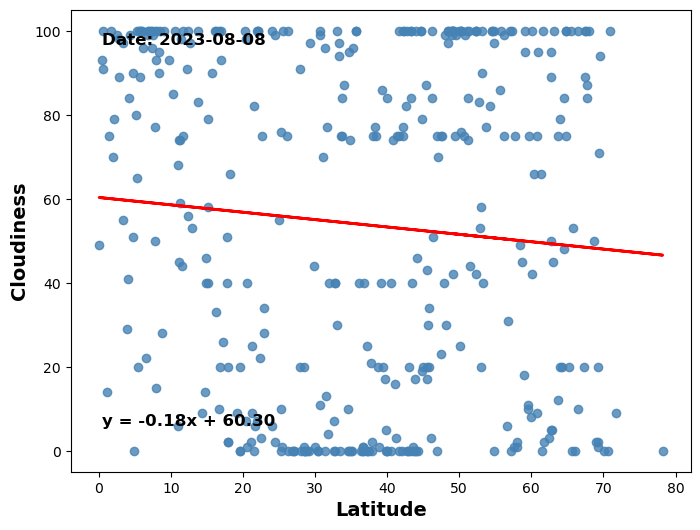

In [20]:
# Linear regression on the Northern Hemisphere for Latitude vs Cloudiness
x_data_north = north_hem_data['Lat']
y_data_north = north_hem_data['Cloudiness']
plot_lin_reg(x_data_north, y_data_north, 'Latitude', 'Cloudiness')  
plt.ylabel('Cloudiness')  
plt.show()

The r-value is: -0.013174045409719877


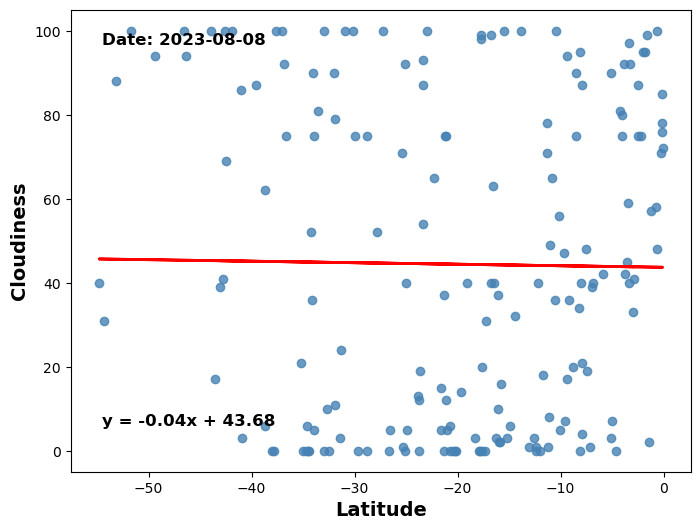

In [21]:
# Linear regression on the Southern Hemisphere for Latitude vs Cloudiness
x_data_south = south_hem_data['Lat']
y_data_south = south_hem_data['Cloudiness']
plot_lin_reg(x_data_south, y_data_south, 'Latitude', 'Cloudiness') 
plt.ylabel('Cloudiness')
plt.show()


**Discussion about the linear relationship (CLOUDINESS):**

The linear regression on the Northern Hemisphere yields a r-value of approximately -0.09, and indicates no correlation between latitude and cloudiness. 

The linear regression on the Southern Hemisphere yields a r-value of approximately -0.01, and indicates no correlation between latitiude and cloudiness. 

CONCLUSION:
Both linear regressions support a conclusion that there insufficient evidence to make  astrong argument that latitude is a good predictor of cloudiness. Therefore, a city's location is not enough accurately predict its cloudiness. 

### Latitude vs Wind Speed Linear Regression Plots

The r-value is: -0.14119199345926212


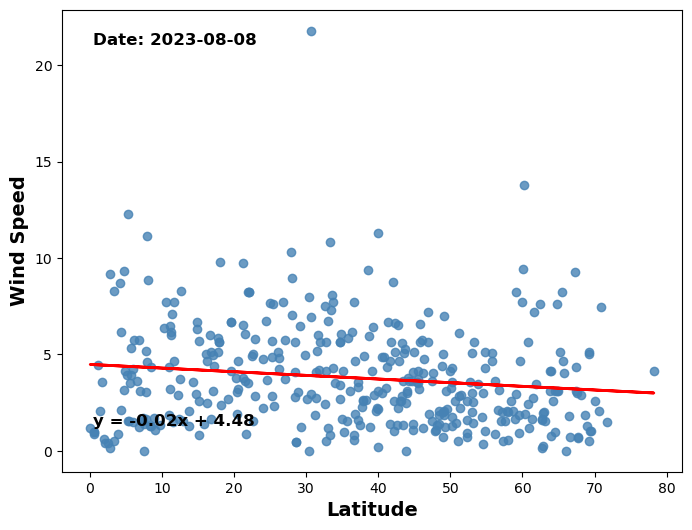

In [22]:
# Linear regression on the Northern Hemisphere for Latitude vs Wind Speed
x_data_north = north_hem_data['Lat']
y_data_north = north_hem_data['Wind Speed']
plot_lin_reg(x_data_north, y_data_north, 'Latitude', 'Wind Speed')  
plt.ylabel('Wind Speed')  
plt.show()

The r-value is: -0.08572786523294931


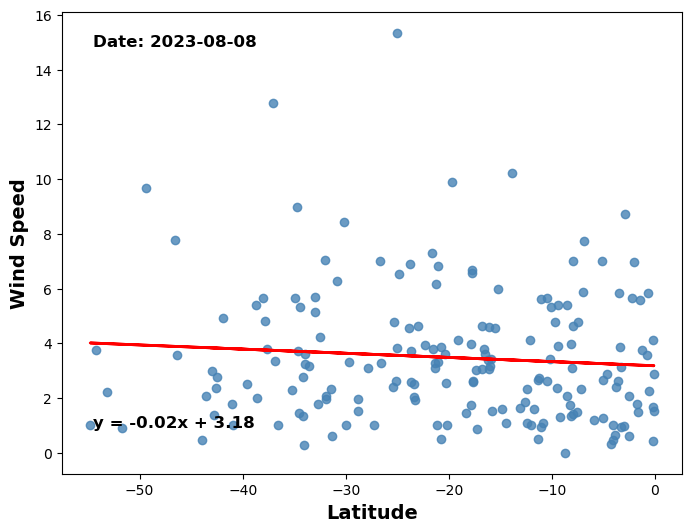

In [23]:
# Linear regression on the Southern Hemisphere for Latitude vs Wind Speed
x_data_south = south_hem_data['Lat']
y_data_south = south_hem_data['Wind Speed']
plot_lin_reg(x_data_south, y_data_south, 'Latitude', 'Wind Speed') 
plt.ylabel('Wind Speed')
plt.show()


**Discussion about the linear relationship (WIND SPEED):**
The linear regression on the Northern Hemisphere yields a r-value of approximately -0.14, and indicates poor correlation between latitude and wind speed. 

The linear regression on the Southern Hemisphere yields a r-value of approximately -0.09, and indicates no correlation between latitiude and wind speed. 

CONCLUSION:
Both linear regressions support the conclusion that there is insufficient evidence to strongly argue that latitude is a significant predictor of wind speed. Therefore, a city's location alone is not enough to predict its level of windiness.